# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import os
sb.set()

# Mounting Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Load Dataset

In [ ]:
Bank_Customer_Data = pd.read_csv('/content/drive/MyDrive/Machine Learning/Assignment 2 Bank customer subscription prediction/bank-full.csv')

In [ ]:
Bank_Customer_Data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


# Descriptive statistics for the Dataset

In [ ]:
Bank_Customer_Data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [ ]:
Bank_Customer_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


# Data Preprocessing

In [ ]:
Bank_Customer_Data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

So there are no null values

## Checking unique values

In [ ]:
for columns in Bank_Customer_Data.columns:
  print(columns)
  print("-"*50)
  print(Bank_Customer_Data[columns].value_counts())
  print("-"*50)

age
--------------------------------------------------
32    2085
31    1996
33    1972
34    1930
35    1894
      ... 
93       2
90       2
95       2
88       2
94       1
Name: age, Length: 77, dtype: int64
--------------------------------------------------
job
--------------------------------------------------
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64
--------------------------------------------------
marital
--------------------------------------------------
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64
--------------------------------------------------
education
--------------------------------------------------
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: educatio

In [ ]:
#Copying the dataset. so our changes will not affact the original dataset.
Bank_Customer_df = Bank_Customer_Data.copy()

## removing the unwanted columns

In [ ]:
Bank_Customer_df.drop(['day', 'month', 'pdays'], axis=1, inplace=True)

## Checking outliers

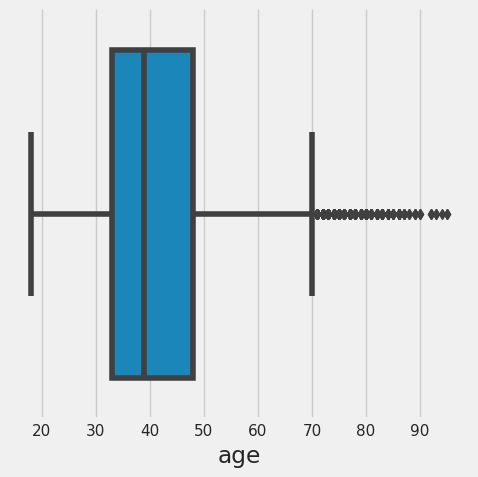

In [ ]:
sb.catplot(x='age',kind='box',data=Bank_Customer_df)

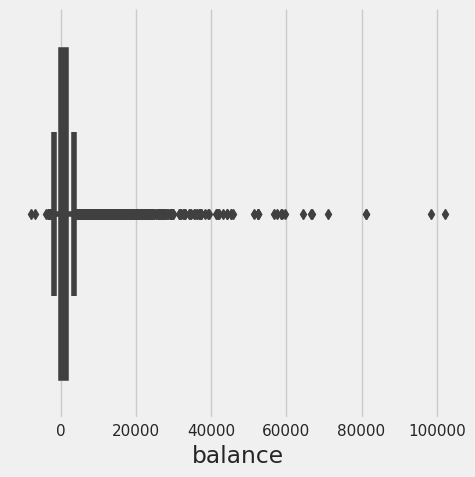

In [ ]:
sb.catplot(x='balance',kind='box',data=Bank_Customer_df)

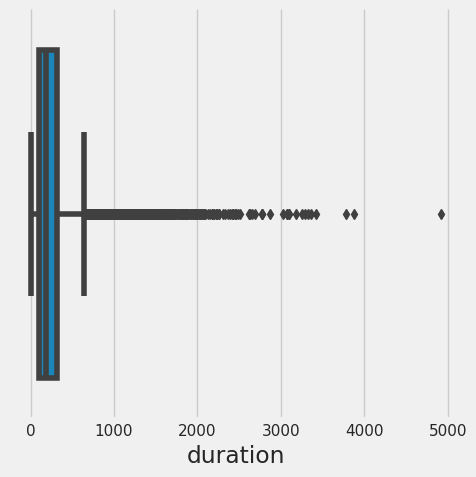

In [ ]:
sb.catplot(x='duration',kind='box',data=Bank_Customer_df)

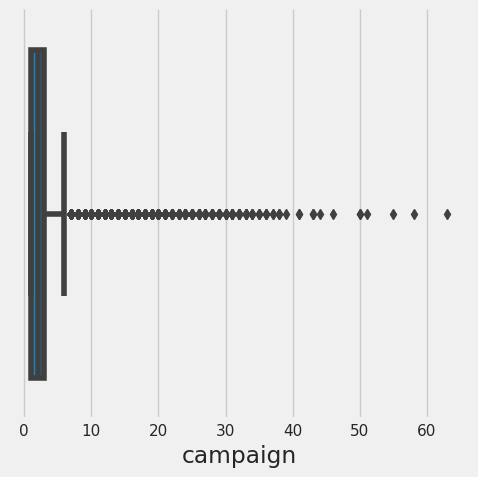

In [ ]:
sb.catplot(x='campaign',kind='box',data=Bank_Customer_df)

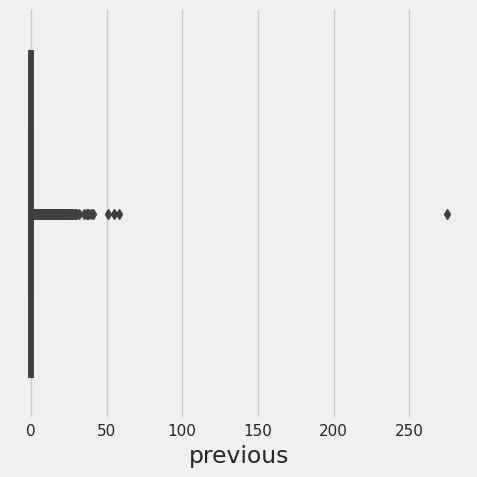

In [ ]:
sb.catplot(x='previous',kind='box',data=Bank_Customer_df)

## Removing outliers

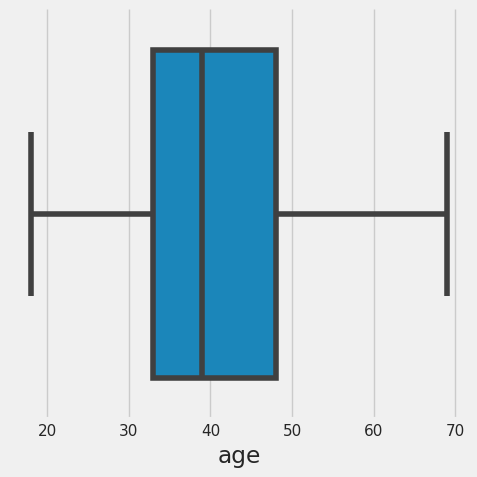

In [ ]:
Bank_Customer_df = Bank_Customer_df[(Bank_Customer_df['age']< 70)]
sb.catplot(x='age',kind='box',data = Bank_Customer_df)

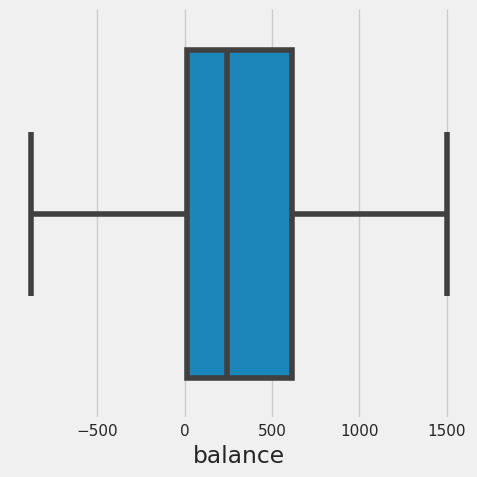

In [ ]:
Bank_Customer_df = Bank_Customer_df[( Bank_Customer_df['balance'] > -880) & ( Bank_Customer_df['balance']< 1500)]
sb.catplot(x='balance',kind='box',data = Bank_Customer_df)

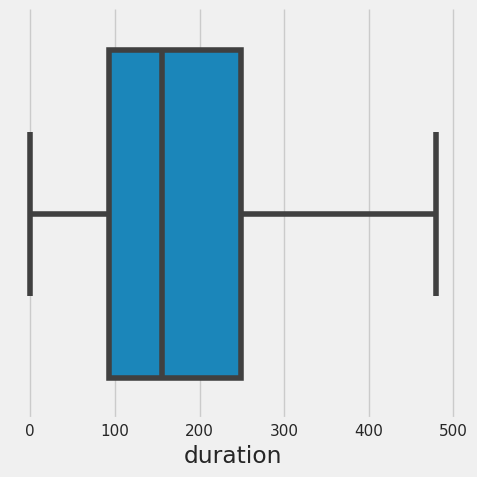

In [ ]:
Bank_Customer_df = Bank_Customer_df[(Bank_Customer_df['duration']< 480)]
sb.catplot(x='duration',kind='box',data = Bank_Customer_df)

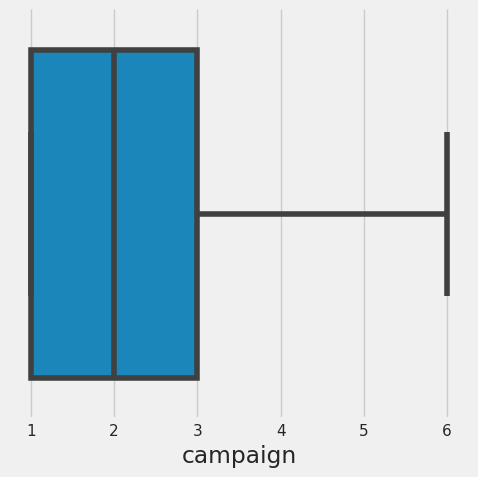

In [ ]:
Bank_Customer_df = Bank_Customer_df[(Bank_Customer_df['campaign']< 7)]
sb.catplot(x='campaign',kind='box',data = Bank_Customer_df)

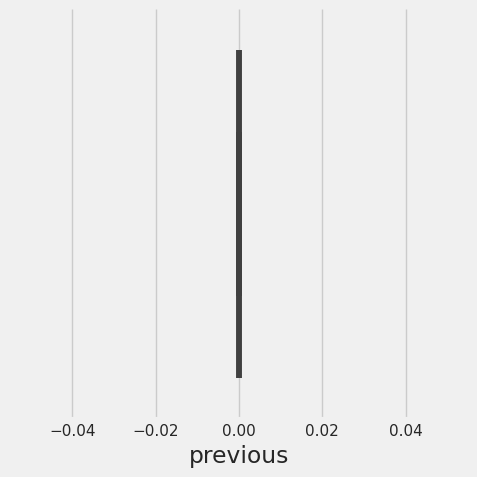

In [ ]:
Bank_Customer_df = Bank_Customer_df[(Bank_Customer_df['previous']< 1)]
sb.catplot(x='previous',kind='box',data = Bank_Customer_df)

# Corelationship Analysis

Now this analysis will tell us if any of the variables are correlated with some other or not. If there is some correlation between any of the variables, we have to deal with the correlated variables so that they won't create any issue in further modelling of our data.

In [ ]:
correlation = Bank_Customer_df.corr()
correlation

<ipython-input-55-b6c2249924d6>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


,age,balance,duration,campaign,previous
age,1.000000,0.050810,-0.048645,0.046508,NaN
balance,0.050810,1.000000,0.014492,-0.008143,NaN
duration,-0.048645,0.014492,1.000000,-0.078527,NaN
campaign,0.046508,-0.008143,-0.078527,1.000000,NaN
previous,NaN,NaN,NaN,NaN,NaN


<Axes: >

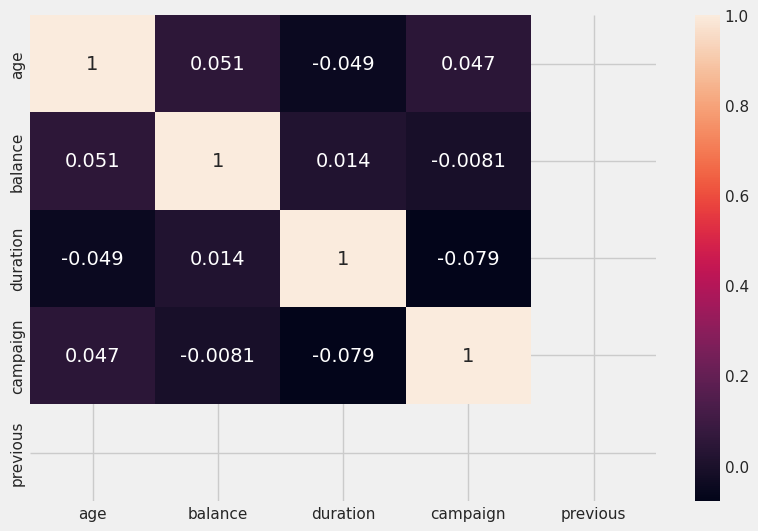

In [ ]:
sb.heatmap(correlation, xticklabels = correlation.columns, yticklabels=correlation.columns, annot=True)

# Visualizing the variables

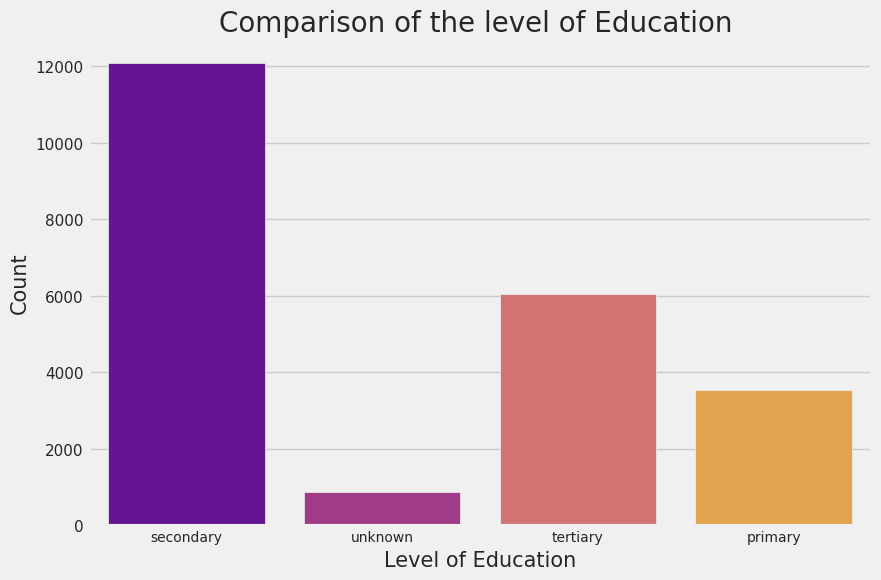

In [ ]:
#Visualizing different educational levels.

plt.rcParams['figure.figsize'] = (9,6)
plt.style.use('fivethirtyeight')

sb.countplot(data=Bank_Customer_df, x='education', palette='plasma')
plt.title('Comparison of the level of Education ', fontweight=30, fontsize=20)
plt.xlabel('Level of Education', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xticks(fontsize=10) #to reduce xtickslabels size to avoid overlapping
#plt.xticks(rotation=45, ha='right') #to rotate to avoid overlapping

plt.show()

# Changing the catogarical values to numerical using OneHotEncoder

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
# Extracting the categorical variables for one-hot encoding
cat_data = Bank_Customer_df[['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'campaign','poutcome']]

# Initializing the OneHotEncoder object
ohe = OneHotEncoder()

# Fitting and transforming categorical data
data_encoded = ohe.fit_transform(cat_data)

# Converting the encoded data to an array
encoded_data_array = data_encoded.toarray()

# Creating a new DataFrame with the encoded data
encoded_df = pd.DataFrame(encoded_data_array, columns=ohe.get_feature_names_out(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'campaign','poutcome']))

# Concatenating the encoded categorical data with the remaining columns of the original dataset
fin_Customer_df = pd.concat([encoded_df, df.drop(columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'campaign', 'poutcome'])], axis=1)


In [ ]:
fin_Customer_df.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,campaign_3,campaign_4,campaign_5,campaign_6,poutcome_unknown,age,balance,duration,previous,Target
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,44.0,29.0,151.0,0.0,no
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,33.0,2.0,76.0,0.0,no
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,33.0,1.0,198.0,0.0,no


In [ ]:
fin_Customer_df[['job_unknown', 'education_unknown', 'contact_unknown','poutcome_unknown']].head()


,job_unknown,education_unknown,contact_unknown,poutcome_unknown
0,0.0,0.0,1.0,1.0
1,0.0,0.0,1.0,1.0
2,1.0,1.0,1.0,1.0
3,0.0,0.0,1.0,1.0
4,0.0,0.0,1.0,1.0


In [ ]:
fin_Customer_df.tail()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,campaign_3,campaign_4,campaign_5,campaign_6,poutcome_unknown,age,balance,duration,previous,Target
45198,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,37.0,1428.0,333.0,0.0,no
45202,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,34.0,557.0,224.0,0.0,yes
45203,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,23.0,113.0,266.0,0.0,yes
45205,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,25.0,505.0,386.0,0.0,yes
45207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,71.0,1729.0,456.0,0.0,yes


# Removing "Unknown" columns

In [ ]:
fin_Customer_df.drop(['job_unknown', 'education_unknown', 'contact_unknown','poutcome_unknown'], axis=1, inplace=True)

In [ ]:
print(fin_Customer_df.columns)

Index(['job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'marital_divorced',
       'marital_married', 'marital_single', 'education_primary',
       'education_secondary', 'education_tertiary', 'default_no',
       'default_yes', 'housing_no', 'housing_yes', 'loan_no', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'campaign_1', 'campaign_2',
       'campaign_3', 'campaign_4', 'campaign_5', 'campaign_6', 'age',
       'balance', 'duration', 'previous', 'Target'],
      dtype='object')


In [ ]:
fin_Customer_df.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,campaign_2,campaign_3,campaign_4,campaign_5,campaign_6,age,balance,duration,previous,Target
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,58.0,2143.0,261.0,0.0,no
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,44.0,29.0,151.0,0.0,no
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,33.0,2.0,76.0,0.0,no
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,47.0,1506.0,92.0,0.0,no
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,33.0,1.0,198.0,0.0,no


In [ ]:
fin_Customer_df = fin_Customer_df.dropna(how ='any',axis = 0)

In [ ]:
fin_Customer_df.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,campaign_2,campaign_3,campaign_4,campaign_5,campaign_6,age,balance,duration,previous,Target
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,58.0,2143.0,261.0,0.0,no
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,44.0,29.0,151.0,0.0,no
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,33.0,2.0,76.0,0.0,no
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,47.0,1506.0,92.0,0.0,no
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,33.0,1.0,198.0,0.0,no


In [ ]:
fin_Customer_df.shape

(22232, 36)

# Replacing the y variable with the numerical value

In [ ]:
#label encoding for the y variable
fin_Customer_df['Target'] = fin_Customer_df['Target'].replace('yes',1)
fin_Customer_df['Target'] = fin_Customer_df['Target'].replace('no',0)

In [ ]:
x = fin_Customer_df.drop(columns = ['Target'])
y = fin_Customer_df['Target']

In [ ]:
fin_Customer_df.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,campaign_2,campaign_3,campaign_4,campaign_5,campaign_6,age,balance,duration,previous,Target
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,58.0,2143.0,261.0,0.0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,44.0,29.0,151.0,0.0,0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,33.0,2.0,76.0,0.0,0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,47.0,1506.0,92.0,0.0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,33.0,1.0,198.0,0.0,0


# Splitting the Train-test data

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size = 0.75,random_state=0)

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(16674, 35)
(16674,)
(5558, 35)
(5558,)


In [ ]:
#Scaling the values
from sklearn.preprocessing import MinMaxScaler

mm = MinMaxScaler()

x_train = mm.fit_transform(x_train)
x_test = mm.transform(x_test)

# performing the model

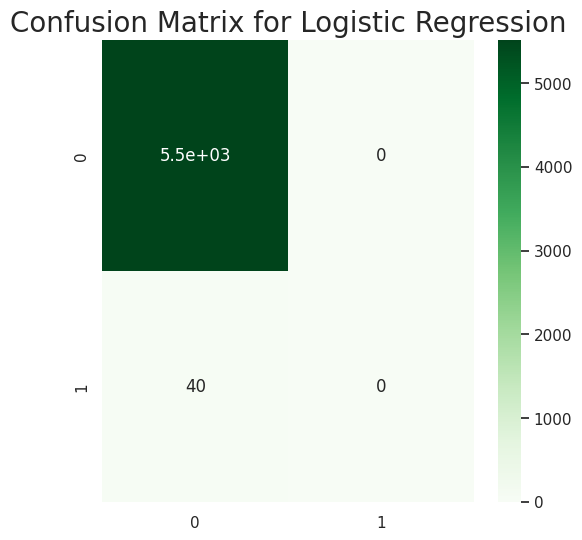

Training Accuracy: 0.9901043540842029
Testing Accuracy: 0.9928031666066931

Classification Report :
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      5518
           1       0.00      0.00      0.00        40

    accuracy                           0.99      5558
   macro avg       0.50      0.50      0.50      5558
weighted avg       0.99      0.99      0.99      5558


Area Under Curve :
 0.5


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sb
# creating a model
model = LogisticRegression()

# feeding the training data to the model
model.fit(x_train, y_train)

#predicting the test set results
y_pred = model.predict(x_test)

# printing the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (6, 6)
sb.heatmap(cm, annot=True, cmap='Greens')
plt.title('Confusion Matrix for Logistic Regression', fontweight=30, fontsize=20)
plt.show()

# Calculating the classification accuracies
print("Training Accuracy:", model.score(x_train, y_train))
print("Testing Accuracy:", model.score(x_test, y_test))

CR_RF = classification_report(y_test, y_pred)
fprRF, recallRF, thresholdRF = roc_curve(y_test, y_pred)
AUC_RF = auc(fprRF, recallRF)

resultsRF = {"\nClassification Report": CR_RF, "\nArea Under Curve": AUC_RF}

# Printing the results
for measure in resultsRF:
    print(measure, ":\n", resultsRF[measure])
